In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        (os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Importing important libraries

In [2]:
import pathlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout,Flatten
from tensorflow.keras.layers import Conv2D,MaxPooling2D
import cv2
from sklearn.model_selection import train_test_split
import os
import pandas as pd
import random
from keras.preprocessing.image import ImageDataGenerator

# Loading dataset and creating a dataframe for splitting and training purpose

In [3]:
path = '../input/traffic-sign-dataset-classification/traffic_Data/DATA'
label_df = pd.read_csv('../input/traffic-sign-dataset-classification/labels.csv')
path1 = pathlib.Path(path)
label_df.sample(5)

,ClassId,Name
10,10,Dont Go straight
8,8,Dont Go straight or left
3,3,Speed limit (40km/h)
26,26,keep Right
33,33,Traffic signals


In [4]:
sign_images_dict = {}
labels_dict = label_df.to_dict()

In [5]:
del labels_dict['ClassId']
labels_dict['Name']

{0: 'Speed limit (5km/h)',
 1: 'Speed limit (15km/h)',
 2: 'Speed limit (30km/h)',
 3: 'Speed limit (40km/h)',
 4: 'Speed limit (50km/h)',
 5: 'Speed limit (60km/h)',
 6: 'Speed limit (70km/h)',
 7: 'speed limit (80km/h)',
 8: 'Dont Go straight or left',
 9: 'Dont Go straight or Right',
 10: 'Dont Go straight',
 11: 'Dont Go Left',
 12: 'Dont Go Left or Right',
 13: 'Dont Go Right',
 14: 'Dont overtake from Left',
 15: 'No Uturn',
 16: 'No Car',
 17: 'No horn',
 18: 'Speed limit (40km/h)',
 19: 'Speed limit (50km/h)',
 20: 'Go straight or right',
 21: 'Go straight',
 22: 'Go Left',
 23: 'Go Left or right',
 24: 'Go Right',
 25: 'keep Left',
 26: 'keep Right',
 27: 'Roundabout mandatory',
 28: 'watch out for cars',
 29: 'Horn',
 30: 'Bicycles crossing',
 31: 'Uturn',
 32: 'Road Divider',
 33: 'Traffic signals',
 34: 'Danger Ahead',
 35: 'Zebra Crossing',
 36: 'Bicycles crossing',
 37: 'Children crossing',
 38: 'Dangerous curve to the left',
 39: 'Dangerous curve to the right',
 40: 'Unk

In [6]:
len_classes = os.listdir(path)
for img in range(len(len_classes)):
    sign_images_dict[img] = list(path1.glob(str(img)+'/*'))
sign_images_dict[0][0]

PosixPath('../input/traffic-sign-dataset-classification/traffic_Data/DATA/0/000_1_0006.png')

In [7]:
x,y=[],[]
for sign_label,images in sign_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(224,224))
        x.append(resized_img)
        y.append(sign_label)
x = np.array(x)
y = np.array(y)
x[0]

array([[[ 20,  24,  25],
        [ 34,  37,  36],
        [ 59,  60,  55],
        ...,
        [ 29,  36,  37],
        [ 32,  39,  41],
        [ 34,  41,  43]],

       [[ 29,  34,  35],
        [ 37,  41,  40],
        [ 51,  54,  48],
        ...,
        [ 30,  36,  37],
        [ 33,  40,  41],
        [ 35,  42,  44]],

       [[ 49,  55,  57],
        [ 43,  50,  49],
        [ 34,  40,  35],
        ...,
        [ 31,  37,  38],
        [ 35,  41,  43],
        [ 37,  43,  46]],

       ...,

       [[  6,   9,   4],
        [  6,   9,   4],
        [  8,   9,   5],
        ...,
        [188, 213, 225],
        [176, 202, 214],
        [170, 195, 208]],

       [[  6,   8,   5],
        [  6,   8,   5],
        [  8,   9,   5],
        ...,
        [186, 211, 226],
        [172, 198, 213],
        [164, 189, 206]],

       [[  6,   8,   5],
        [  6,   8,   5],
        [  8,   9,   5],
        ...,
        [185, 210, 227],
        [170, 196, 213],
        [162, 187, 205]]

# Feature Visualization

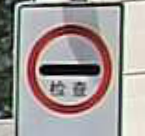

In [8]:
import PIL
PIL.Image.open(str(sign_images_dict[57][5]))

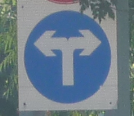

In [9]:
PIL.Image.open(str(sign_images_dict[23][4]))

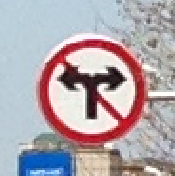

In [10]:
PIL.Image.open(str(sign_images_dict[12][12]))

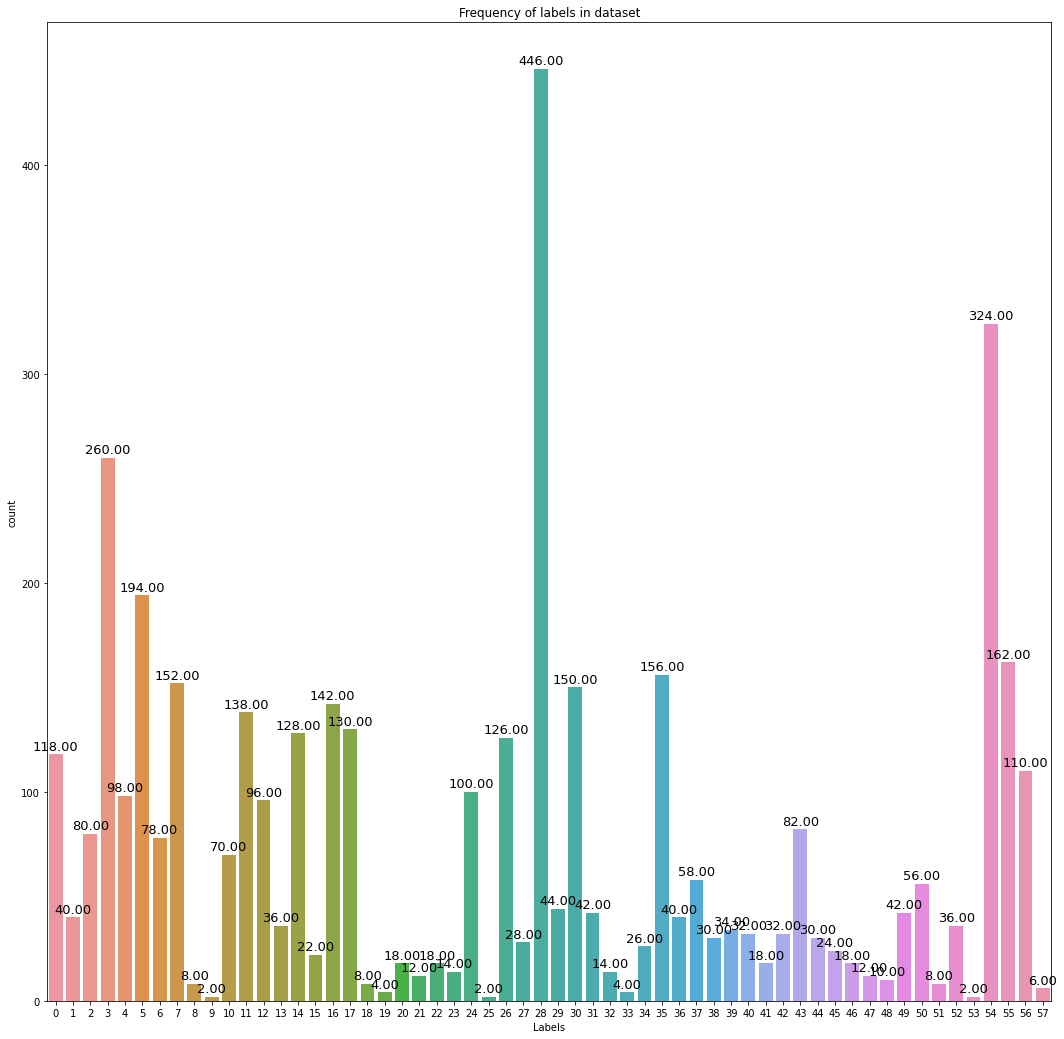

In [11]:
plt.figure(figsize=(18,18))
plot = sns.countplot(x=y)
for bar in plot.patches:
    plot.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=13, xytext=(0, 8),
                   textcoords='offset points')
plt.xlabel('Labels')
plt.title('Frequency of labels in dataset')
plt.show()

# Splitting of data

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.1)

In [13]:
x_train = x_train/255
x_test = x_test/255

In [14]:
print("DATA SHAPES")
print("Train:  ")
print(x_train.shape,y_train.shape)
print("Test:  ")
print(x_test.shape,y_test.shape)

DATA SHAPES
Train:  
(3753, 224, 224, 3) (3753,)
Test:  
(417, 224, 224, 3) (417,)


In [15]:
datagen=ImageDataGenerator(width_shift_range=0.1,height_shift_range=0.1,zoom_range=0.2,shear_range=0.1,rotation_range=10)
datagen.fit(x_train)
batches=datagen.flow(x_train,y_train,batch_size=20)
#train_generator = image_data_generator.flow_from_directory(directory, batch_size=32, class_mode='categorical', target_size=(299,299), subset=None, seed=None)    
x_batch,y_batch=next(batches)

# Usage of pre-trained model i.e. MobileNet v2 and fitting of the data

In [16]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False)


2022-03-09 08:41:06.888080: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [17]:
model = Sequential([
    pretrained_model_without_top_layer,
    keras.layers.Dense(len(len_classes))
])

In [18]:
callback = keras.callbacks.EarlyStopping(monitor='loss', patience=3, restore_best_weights=True)
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

history = model.fit(x_train, y_train, epochs=5,callbacks=[callback])

2022-03-09 08:41:14.056897: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/5
118/118 [==============================] - 46s 350ms/step - loss: 1.3814 - acc: 0.6925
Epoch 2/5
118/118 [==============================] - 41s 347ms/step - loss: 0.2704 - acc: 0.9539
Epoch 3/5
118/118 [==============================] - 42s 357ms/step - loss: 0.1287 - acc: 0.9853
Epoch 4/5
118/118 [==============================] - 41s 347ms/step - loss: 0.0794 - acc: 0.9939
Epoch 5/5
118/118 [==============================] - 41s 345ms/step - loss: 0.0528 - acc: 0.9981


In [19]:
model.evaluate(x_test,y_test)

14/14 [==============================] - 6s 300ms/step - loss: 0.0796 - acc: 0.9904


[0.07959278672933578, 0.9904076457023621]

## Evaluation of the model and with sample testing

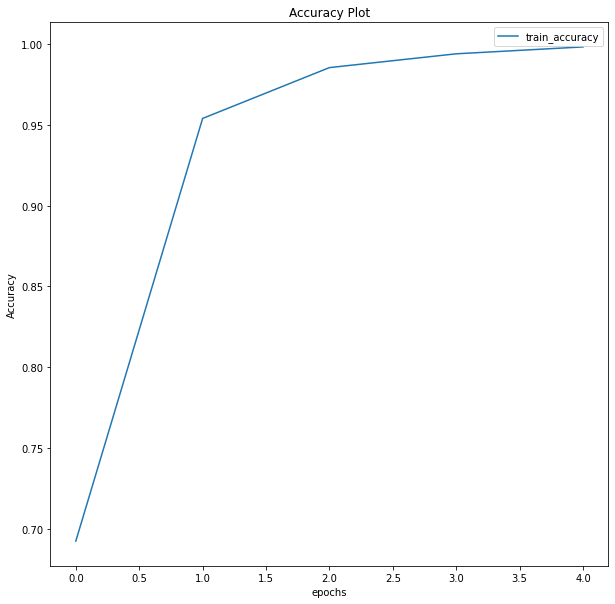

In [20]:
plt.figure(figsize=(10,10))
plt.plot(history.history['acc'],label='train_accuracy')
plt.title("Accuracy Plot")
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [21]:
y_pred = model.predict(x_test)

In [22]:
y_pred1 = np.argmax(y_pred,axis=1)
y_pred1

array([43, 28, 55, 28, 46, 35, 17, 17, 35, 54,  3, 28, 37, 45, 24, 14, 54,
       28, 30, 32, 24, 16,  8, 11, 28,  0, 17, 34, 16, 24,  3, 44,  5, 56,
       37,  5, 28, 49, 24, 10, 32, 35,  6, 30, 14, 14, 40,  4, 17, 28, 35,
       35,  5, 30, 28, 37, 31, 21, 28, 24,  7, 10, 29, 26, 14, 35, 14, 28,
       28, 16,  3, 54, 12,  5,  5, 20, 40, 20,  4,  3, 38,  3, 55, 55, 14,
       26, 28, 12,  7, 54, 30, 55, 43, 55, 28,  7, 56, 43, 50, 31, 54,  1,
       54, 38, 28, 54, 49, 55,  4,  5, 55, 15, 10, 54, 55, 17, 38, 54, 11,
       55, 29,  5, 49, 28,  7, 54, 38, 38, 34, 52, 37, 24, 11,  3,  7, 14,
       54,  3, 16, 49, 10, 36, 50, 55,  3, 56, 54, 30, 26, 24, 28, 33, 11,
       51, 55, 55, 46, 28, 43, 14, 26, 28, 38, 10, 11, 49, 28, 12, 36,  6,
        1,  0, 54, 10, 56, 17, 30,  3, 12,  3, 54, 55, 28,  0, 32, 56, 26,
       24,  3, 40, 43, 14,  5, 56,  5, 56,  7, 50, 52, 22, 50, 26,  5, 30,
       27, 24, 11, 54, 54, 13, 26, 49, 28,  5, 28,  7, 17, 28, 35,  4, 54,
       11, 17, 14, 37, 20

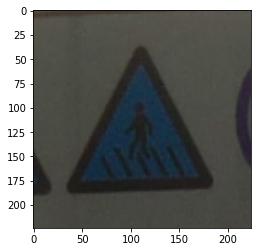

In [23]:
plt.imshow(x_test[5])

In [24]:
labels_dict['Name'][y_pred1[5]]

'Zebra Crossing'

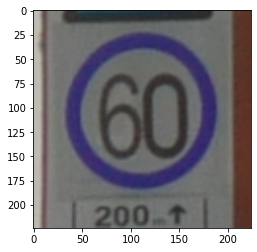

In [25]:
plt.imshow(x_test[52])

In [26]:
labels_dict['Name'][y_pred1[52]]

'Speed limit (60km/h)'

#### You can see how accurately the model is predicting a traffic sign.